In [7]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [8]:
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [10]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [12]:
df.shape

(645675, 5)

In [13]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [14]:
df = df.dropna(how = 'any', axis = 0)

In [15]:
df.shape

(620027, 5)

In [16]:
df.rename(columns = {'dt': 'Date','AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'},inplace =True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [17]:
# Converting column to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Making the date column as index column
df.set_index('Date', inplace = True)
df.index


DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [18]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [19]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [20]:
df.Year.describe()

count    620027.000000
mean       1902.331598
std          67.831393
min        1743.000000
25%        1851.000000
50%        1906.000000
75%        1960.000000
max        2013.000000
Name: Year, dtype: float64

In [21]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [22]:
# GRoup Countries on basis of temperature

latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values("Avg_temp")

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


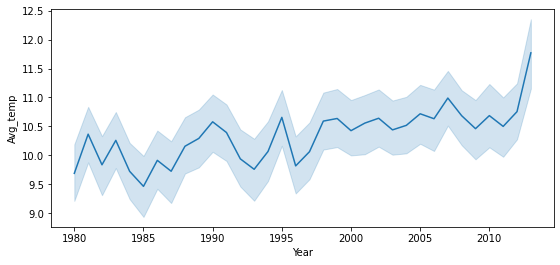

In [23]:
plt.figure(figsize=(9,4))
sns.lineplot(x = "Year", y = 'Avg_temp', data = latest_df)
plt.show()

In [24]:
resample_df = latest_df[["Avg_temp"]].resample("A").mean()

In [25]:
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


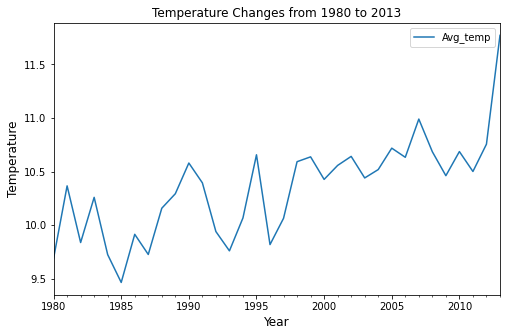

In [26]:
resample_df.plot(title = 'Temperature Changes from 1980 to 2013', figsize  =(8,5))
plt.ylabel("Temperature", fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.legend()

In [27]:
#  Appyling Dickey Fuller to Check For Stationarity in the Data

#  Null hypothesis is that time series is not stationary and is affected by trends

from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results: ')
test_df = adfuller(resample_df.iloc[:,0].values,autolag = 'AIC')
df_output = pd.Series(test_df[0:4],index = ["Test Statistic","p-value", "Lags Used","Number of Observations Used"])
for key, value in test_df[4].items():
    df_output['Critical Value(%s)'%key] = value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64


In [28]:
# Printng components of time series data 
decomp = seasonal_decompose(resample_df, freq = 3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

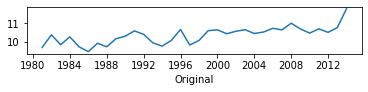

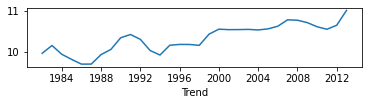

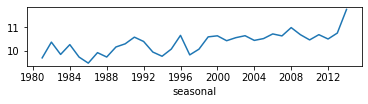

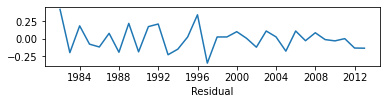

<Figure size 432x360 with 0 Axes>

In [29]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize = (6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize = (6,5))

plt.subplot(413)
plt.plot(resample_df)
plt.xlabel('seasonal')
plt.figure(figsize = (6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize = (6,5))

plt.tight_layout()

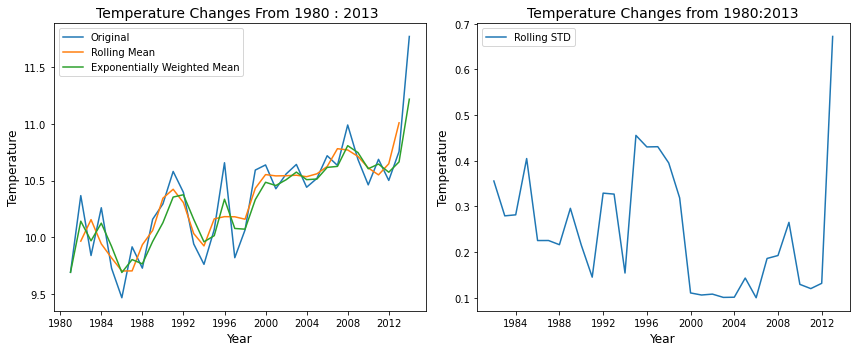

In [35]:
# By trend line we cam see data isint stationary

# making data stationary

rol_mean = resample_df.rolling(window = 3, center = True).mean()
ewm = resample_df.ewm(span = 3).mean()

rol_std = resample_df.rolling(window = 3, center = True).std()

# Subplot 
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.plot(resample_df,label = 'Original')

ax1.plot(rol_mean,label = 'Rolling Mean')

ax1.plot(ewm,label = 'Exponentially Weighted Mean')

ax1.set_title('Temperature Changes From 1980 : 2013 ', fontsize = 14)

ax1.set_ylabel('Temperature', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)

ax1.legend()

ax2.plot(rol_std, label="Rolling STD")
ax2.set_title('Temperature Changes from 1980:2013',fontsize = 14)
ax2.set_ylabel('Temperature',fontsize = 12)
ax2.set_xlabel('Year',fontsize = 12)
ax2.legend()

plt.tight_layout()
plt.show()

In [45]:
rol_mean.dropna(inplace = True)
ewm.dropna(inplace = True)

# print('Dickey Fuller Test for Rolling Mean')
# df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
# df_output = pd.Series(df_test[0:4], index = ["Test Staistic", "pvalue","Lags Used", "Number Of Observations Used"])
# for key,values in df_test[4].items():
#     df_output['Critical Value (&s)'%key] = value
# print(df_output)
print("")
print("Dickey Fuller Test for Exponentially Weigted Mean:")
df_text = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4], index = ["Test Staistic", "pvalue","Lags Used", "Number Of Observations Used"])
for key,values in df_test[4].items():
    df_output['Critical Value(&s)'%key] = value
print(df_output)



Dickey Fuller Test for Exponentially Weigted Mean:


TypeError: not all arguments converted during string formatting

In [42]:

from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results: ')
test_df = adfuller(resample_df.iloc[:,0].values,autolag = 'AIC')
df_output = pd.Series(test_df[0:4],index = ["Test Statistic","p-value", "Lags Used","Number of Observations Used"])
for key, value in test_df[4].items():
    df_output['Critical Value(%s)'%key] = value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64
